In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
n_samples = 500
magnitude = np.random.uniform(2.5, 8.0, n_samples)
depth = np.random.uniform(0, 700, n_samples)
frequency = np.random.poisson(5, n_samples)
time = np.linspace(0, 1000, n_samples)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
n_samples = 500
magnitude = np.random.uniform(2.5, 8.0, n_samples)
depth = np.random.uniform(0, 700, n_samples)
frequency = np.random.poisson(5, n_samples)
time = np.linspace(0, 1000, n_samples)
data = {'magnitude': magnitude, 'depth': depth, 'frequency': frequency, 'time': time}
data = pd.DataFrame(data)
data['label'] = np.random.randint(0, 2, n_samples)  # Example: random labels
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Adding cluster labels to the dataset (optional)
data['cluster'] = kmeans.predict(scaler.transform(X))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[26 20]
 [30 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.57      0.51        46
           1       0.55      0.44      0.49        54

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.51      0.50      0.50       100



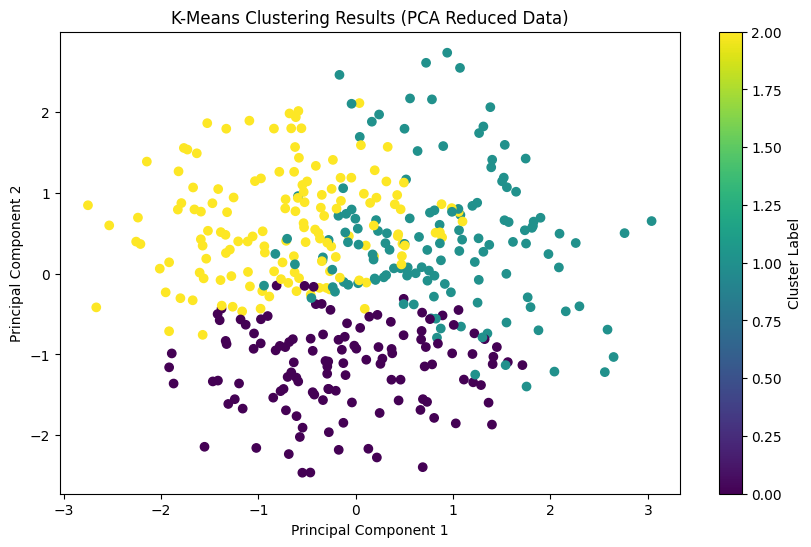

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering Results (PCA Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


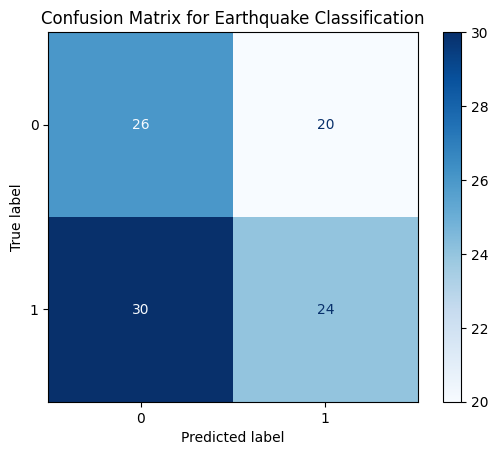

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix for Earthquake Classification")
plt.show()


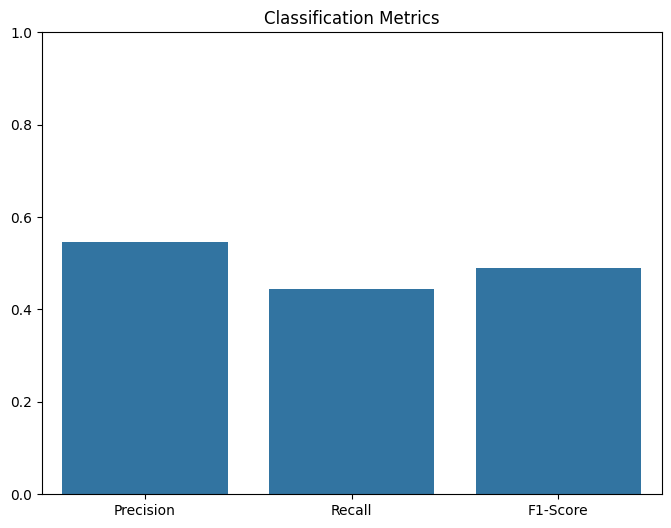

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=scores)
plt.ylim(0, 1)
plt.title('Classification Metrics')
plt.show()


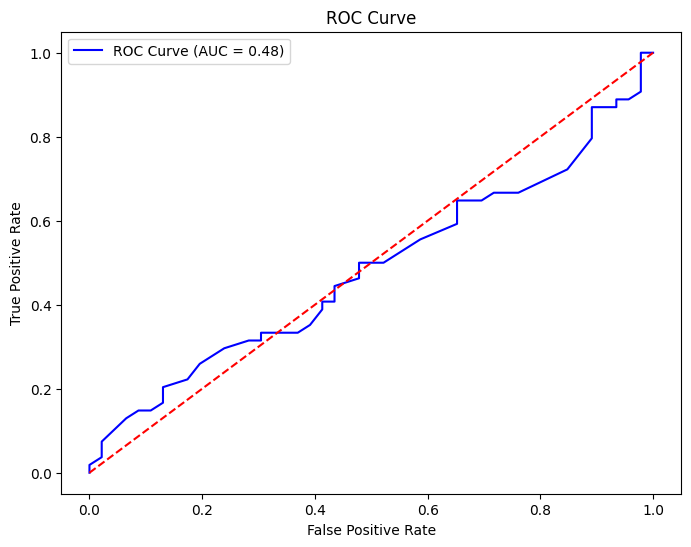

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


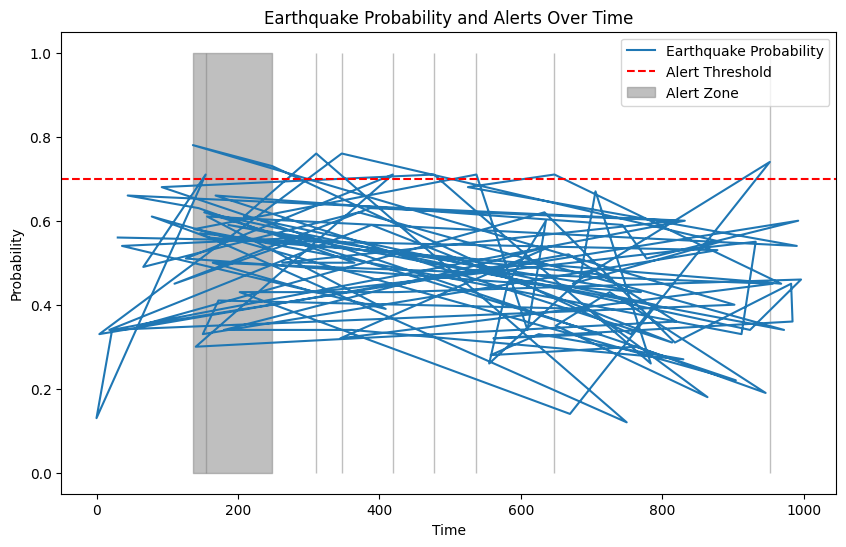

In [ ]:

alert_threshold = 0.7
time_series = X_test['time'].values
plt.figure(figsize=(10, 6))
plt.plot(time_series, y_proba, label='Earthquake Probability')
plt.axhline(y=alert_threshold, color='red', linestyle='--', label='Alert Threshold')
plt.fill_between(time_series, 0, 1, where=(y_proba > alert_threshold), color='gray', alpha=0.5, label='Alert Zone')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Earthquake Probability and Alerts Over Time')
plt.legend()
plt.show()
